In [ ]:
#Outline :
#1) Brief Overview
#The project involves the use of a dataset with 600k training data and 59 features/data. 
#In the train and test data, features that belong to similar groupings are
#tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include 
#the postfix bin to indicate binary features and cat to indicate categorical features. 
#Features without these designations are either continuous or ordinal. Values of -1 
#indicate that the feature was missing from the observation.
#The target column signifies whether a claim was filed for that policy holde

#2) Analysis by Type of Target
#a) Analysis by Categories
#b) Feature Names Analysis
#c) Analysis of 0: 'Not Filed', 1: 'Filed'


#3) Correlations and Purposes of Claims
#a) Correlations
#b) claims Purpose

#4) Modeling
#a) Predictive Modelling

#A priori in the train data is 3.645%, which is strongly imbalanced.
#From the means we can conclude that for most variables the value is zero in most cases.

#Handling imbalanced classes
#As we mentioned above the proportion of records with target=1 is far less than target=0. 
#This can lead to a model that has great accuracy but does have any added value in practice. 
#Two possible strategies to deal with this problem are:

#oversampling records with target=1
#undersampling records with target=0



#Data structure and content:-
#Data consist of one target variable (0/1) where 0 means customer didn’t claim insurance and 1 means customer claimed insurance
#We have 59 predictor variables, which are grouped into feature names (e.g., ind, reg, car, calc )
#“Ind” is related to individual or driver
#“reg” is related to region
#“car” is related to car
#“calc” is an calculated feature
#Features have suffix ( “bin” and “Cat”)
#Bin : indicates it is binary feature
#Cat : indicates it is categorical feature

# Understanding Dataset 
# Data structure and content:-
#Data consist of one target variable (0/1) where 0 means customer didn’t claim and 1 means claimed 
#We have 59 predictor variables, which are grouped into feature names (e.g., ind, reg, car, calc )
#“Ind” is related to individual or driver
#“reg” is related to region
#“car” is related to car
#“calc” is an calculated feature
#Features have suffix ( “bin” and “Cat”)
#Bin : indicates it is binary feature
#Cat : indicates it is categorical feature

# Business Importance:-
#For providing a fairer insurance cost on the basis of individual driving habits.
#High cost for drivers who are likely to claim insurance next year and low cost for drivers who are less likely to claim insurance
#Prediction helps to customize insurance products with customers’ habits
#A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

In [1]:
##Import Necessary Libraries

# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Machine learning
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

# Other
from IPython.display import Image
import configparser
import gc # clear RAM
import subprocess
import warnings
import pprint
import time
import os

In [2]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [3]:
### Let's set working directory and import our data
data_nm = pd.read_csv('E:\\D_data\\Info\\A\\Nimmetry\\train.csv')
### and test if everything OK # Getting top 5 observations in the dataset
data_nm.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


# 2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion? 
No , the data is not balanced as seen in below that target '0' is itself is capturing 96.36% and 3.64% as '1'.Which we call it as Im_balance data.1). There is very high imbalance which is evident of the fact that only a small number of people actually file their claim.2). Accuracy is not a good metric in this case.Recall and F1-Score is a better option.

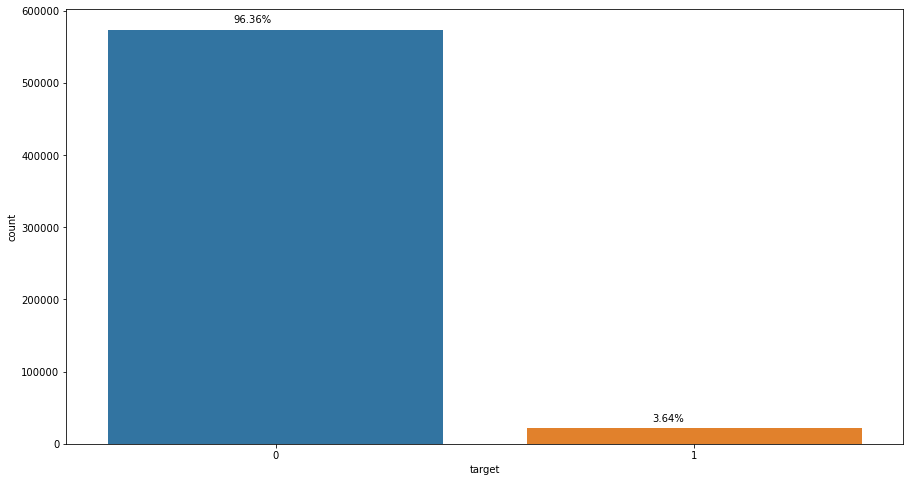

In [4]:
import seaborn as sns
plt.figure(figsize=(15,8))
ax = sns.countplot('target', data=data_nm)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(data_nm['target'])), 
                (p.get_x() + 0.3, p.get_height() + 10000))

# 3. How many categorical features are there? 
As , we can see in below analysis that we have 14 categorical variablles in the data.

# 4. How many binary features are there? 
As in the above analysis we can see that , We have 17 Binary Features in the data.

In [6]:
#Seperating features
#The dataset includes numerical, categorical and binary features. The numerical features consist of ordinal 
#and float values. Each feature type needs to be treated separately, 
#so first of all we can create three lists of columns for the three feature types.

# separate col names into categories
cols = data_nm.columns
num_feats, cat_feats, bin_feats = [], [], []

for col in cols:
    if col == 'id' or col == 'target':
        pass
    elif '_cat' in col:
        cat_feats.append(col)
    elif '_bin' in col:
        bin_feats.append(col)
    else:
        num_feats.append(col)
        
print('--- Numerical features --- : ', '\n', num_feats, '\n')
print('--- Categorical features --- : ', '\n', cat_feats, '\n')
print('--- Binary features --- : ', '\n', bin_feats, '\n')

print ('No. of numeric features: %d'% len(num_feats))
print ('No. of binary features: %d' % len(bin_feats))
print ('No. of Categorical features: %d' % len(cat_feats))

--- Numerical features --- :  
 ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14'] 

--- Categorical features --- :  
 ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'] 

--- Binary features --- :  
 ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'] 

No. of nume

# A co-relation plot which helps in below for deep analysis for numerical categorical and binary features

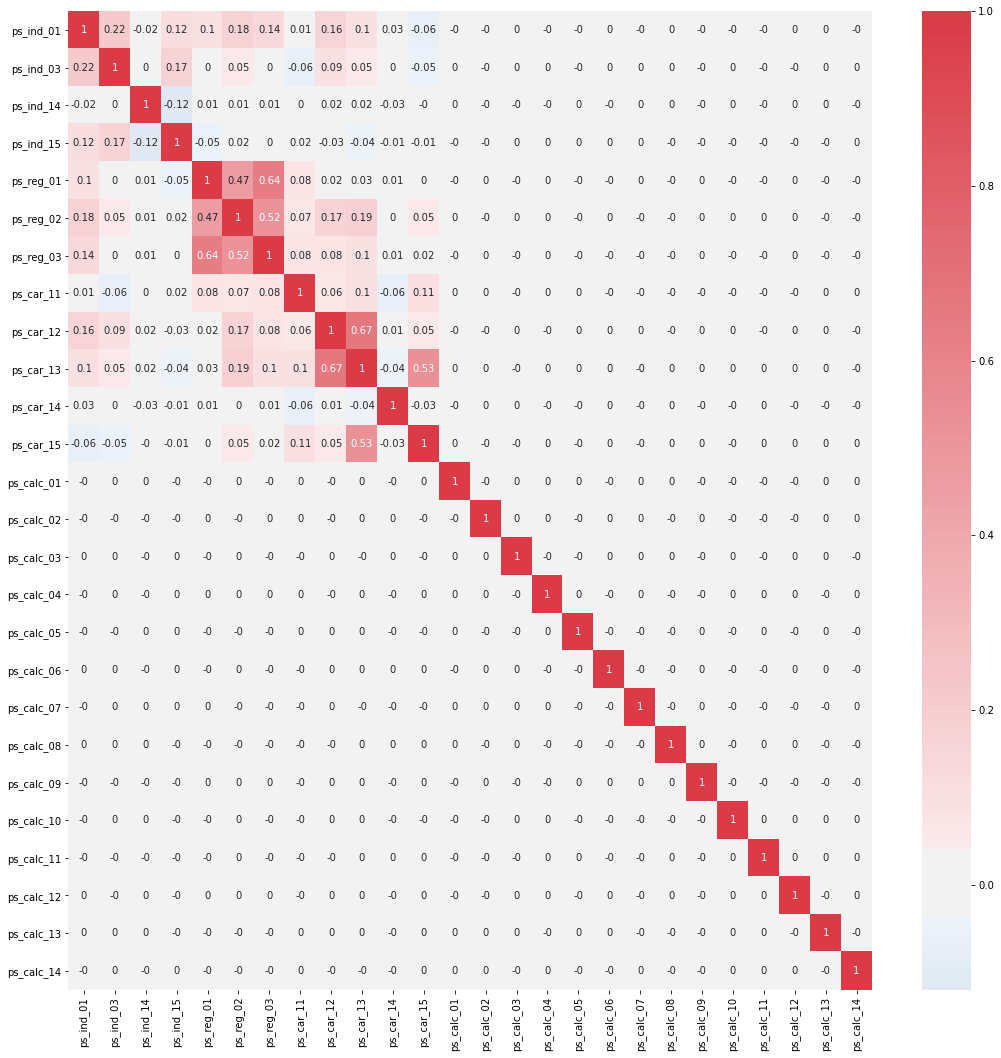

In [32]:
### Co-relation matrix heatmap
# Getting correlation matrix for numeric_fetaures
cor_matrix = data_nm[num_feats].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

#Summary :
#Majority of the features do not show any significant correlation.
#There are a few features that show some negative correlation.
#Positive correlation is also very rare and weak.
#We can safely conclude that our features are independent.¶

#From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. 
#This is quite an interesting observation that will warrant our further investigation later down.
#For now, the paired features that display a positive linear correlation are listed as follows:

#The [calc] variables were totally removed from the selection process which proves that they would only contribute 
#noise if added to the feature set

#Summary:
#Analysis:
#we clearly see strong differences in claim rates within and between the different groups
#whereas others are show no practical impact most “ind” features have a clear influence on claims whereas the calc binary 
#features are neutral.
#The same appears to be true for the calc integer and floating point features; suggesting that the calc group in general 
#is not of immediate usefulness for our prediction goal
#The strongest impact on claim rates is shown by the categorical and integer features; in particular the “ind” and “car” 
#variables
#The effect on the floating point features is much more subtle, but might prove useful in getting the best prediction 
#out of this data

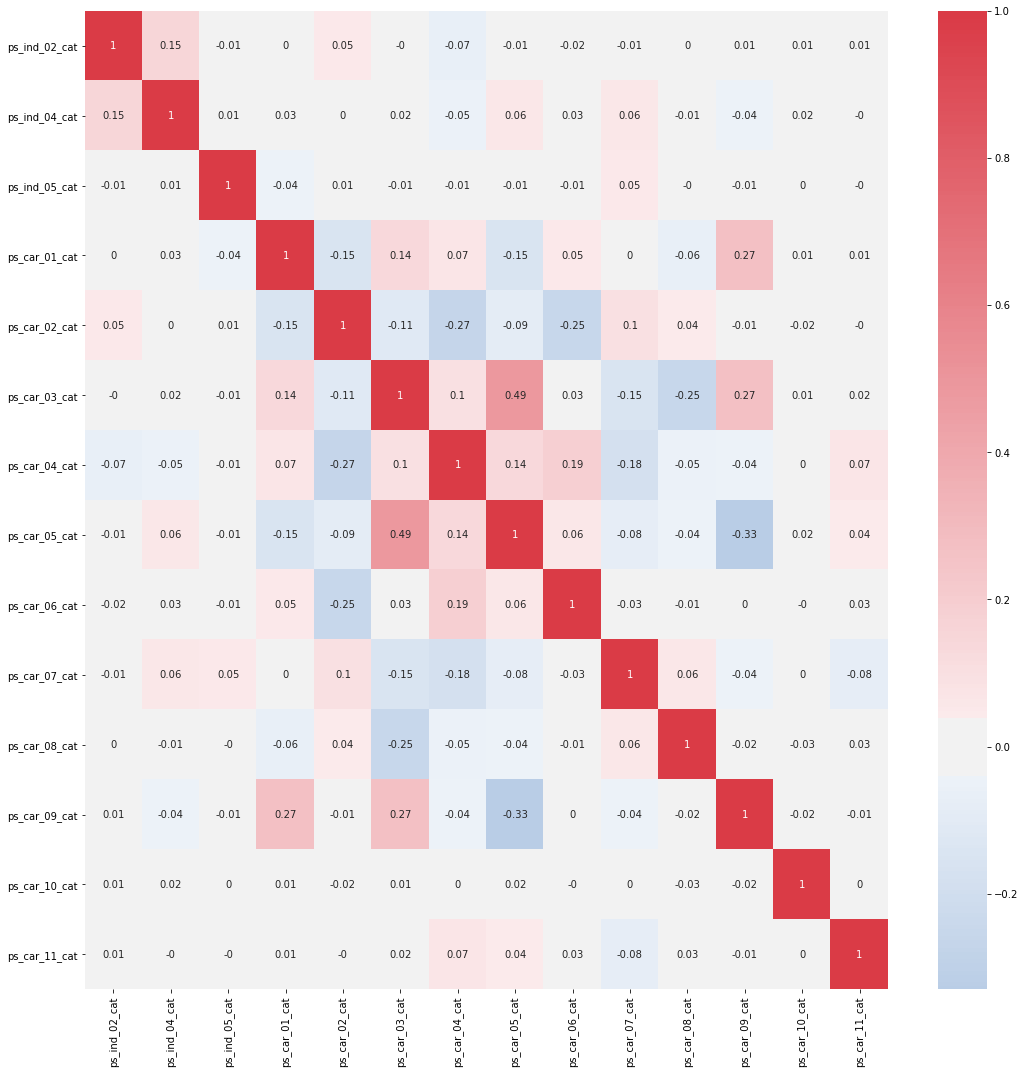

In [33]:
### Co-relation matrix heatmap
# Getting correlation matrix for Categorical Features
cor_matrix_1 = data_nm[cat_feats].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix_1, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

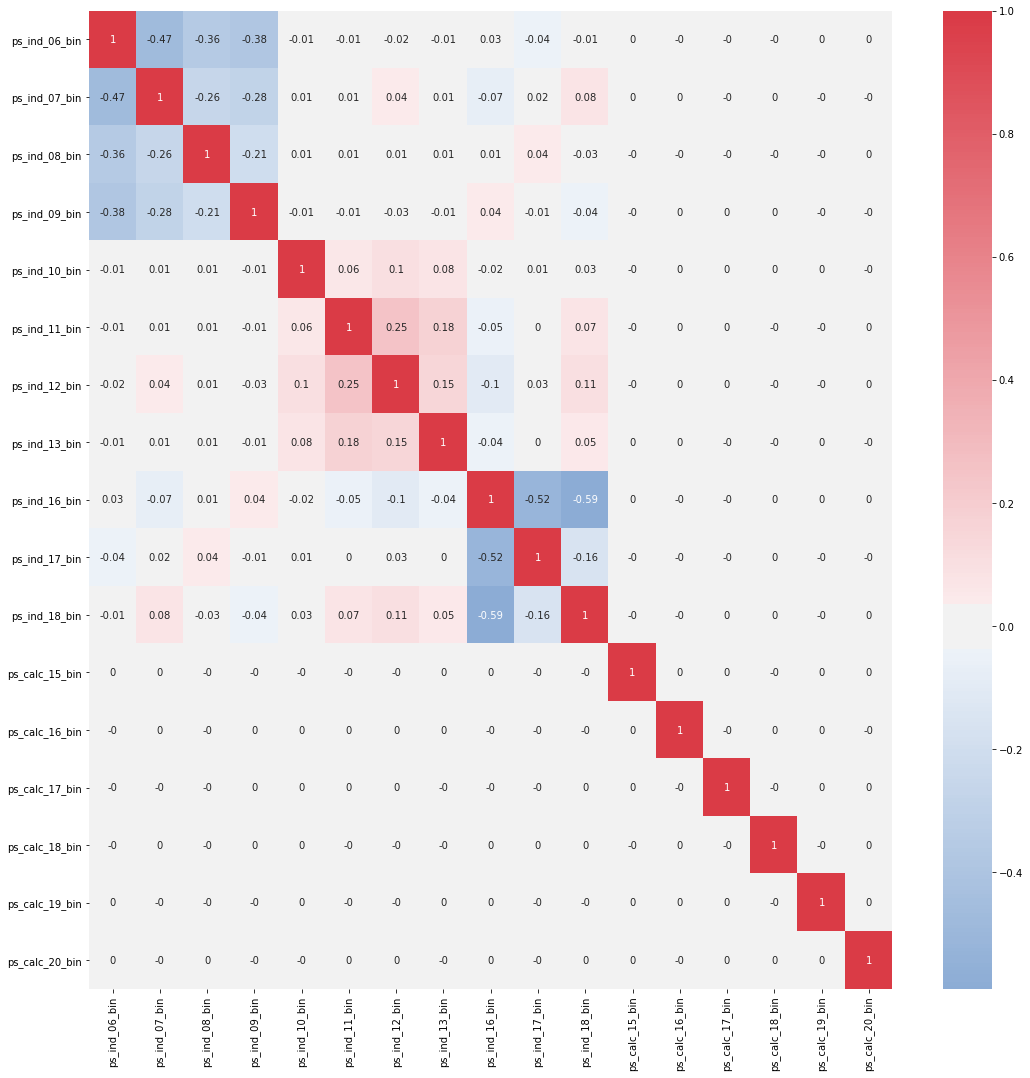

In [34]:
### Co-relation matrix heatmap
# Getting correlation matrix for Binary Features
cor_matrix_2 = data_nm[bin_feats].corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(18,18));
sns.heatmap(cor_matrix_2, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

# 5. Write inferences from data on interval variables. 
A. An interval scale is one where there is order and the difference between two values is meaningful. Here we have 10 interval variables 
#Variables which includes:
ps_reg_01     interval
ps_reg_02     interval
ps_reg_03     interval
ps_car_12     interval
ps_car_13     interval
ps_car_14     interval
ps_car_15     interval
ps_calc_01    interval
ps_calc_02    interval
ps_calc_03    interval


In [7]:
# Here , we define the data to capture which levels they eaxctly belongs too. (Nominal , ordinal , interval , binary)
def get_meta(data_nm):
    data = []
    for col in data_nm.columns:
        # Defining the role
        if col == 'target_name':
            role = 'target_name'
        elif col == 'id':
            role = 'id'
        else:
            role = 'input'

        # Defining the level
        if 'bin' in col or col == 'target_name':
            level = 'binary'
        elif 'cat' in col or col == 'id':
            level = 'nominal'
        elif data_nm[col].dtype == np.float64:
            level = 'interval'
        elif data_nm[col].dtype == np.int64:
            level = 'ordinal'

        # Initialize keep to True for all variables except for id
        keep = True
        if col == 'id':
            keep = False

        # Defining the data type 
        dtype = data_nm[col].dtype

        # Creating a Dict that contains all the metadata for the variable
        col_dict = {
            'varname': col,
            'role'   : role,
            'level'  : level,
            'keep'   : keep,
            'dtype'  : dtype
        }
        data.append(col_dict)
    meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
    meta.set_index('varname', inplace=True)
    return meta

In [8]:
meta_data = get_meta(data_nm)
display(meta_data)

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,input,ordinal,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [9]:
meta_counts = meta_data\
                    .groupby(['role', 'level'])\
                        .agg({'dtype': lambda x: x.count()})\
                            .reset_index()
display(meta_counts)

,role,level,dtype
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,17


In [31]:
meta_data.level[meta_data.level=='interval']

varname
ps_reg_01     interval
ps_reg_02     interval
ps_reg_03     interval
ps_car_12     interval
ps_car_13     interval
ps_car_14     interval
ps_car_15     interval
ps_calc_01    interval
ps_calc_02    interval
ps_calc_03    interval
Name: level, dtype: object

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Variable Type'),
 Text(0.5, 1.0, 'Variables Count Across Datatype')]

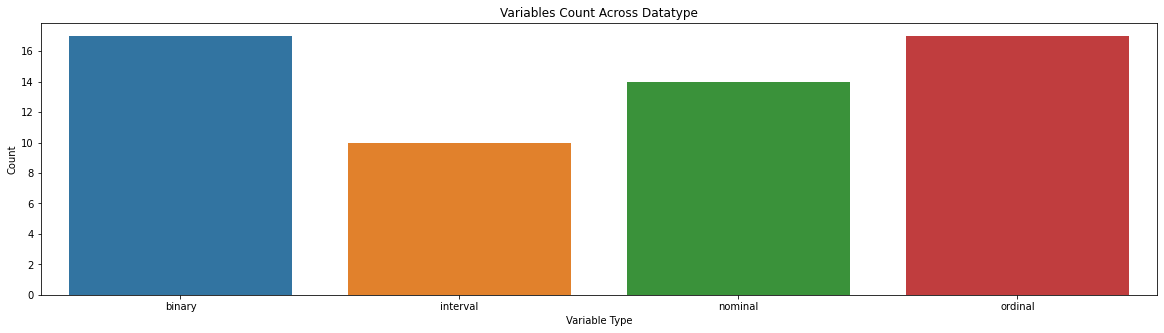

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=meta_counts[(meta_counts.role != 'target_name') & (meta_counts.role != 'id') ],
            x="level",
            y="dtype",
            ax=ax)

ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

# The calc variables were totally removed from the selection process which proves that they would only contribute noise if added to the feature set.

Summary :
1. Majority of the features do not show any significant correlation.
2. There are a few features that show some negative correlation.
3. Positive correlation is also very rare and weak.
4. We can safely conclude that our features are independent.

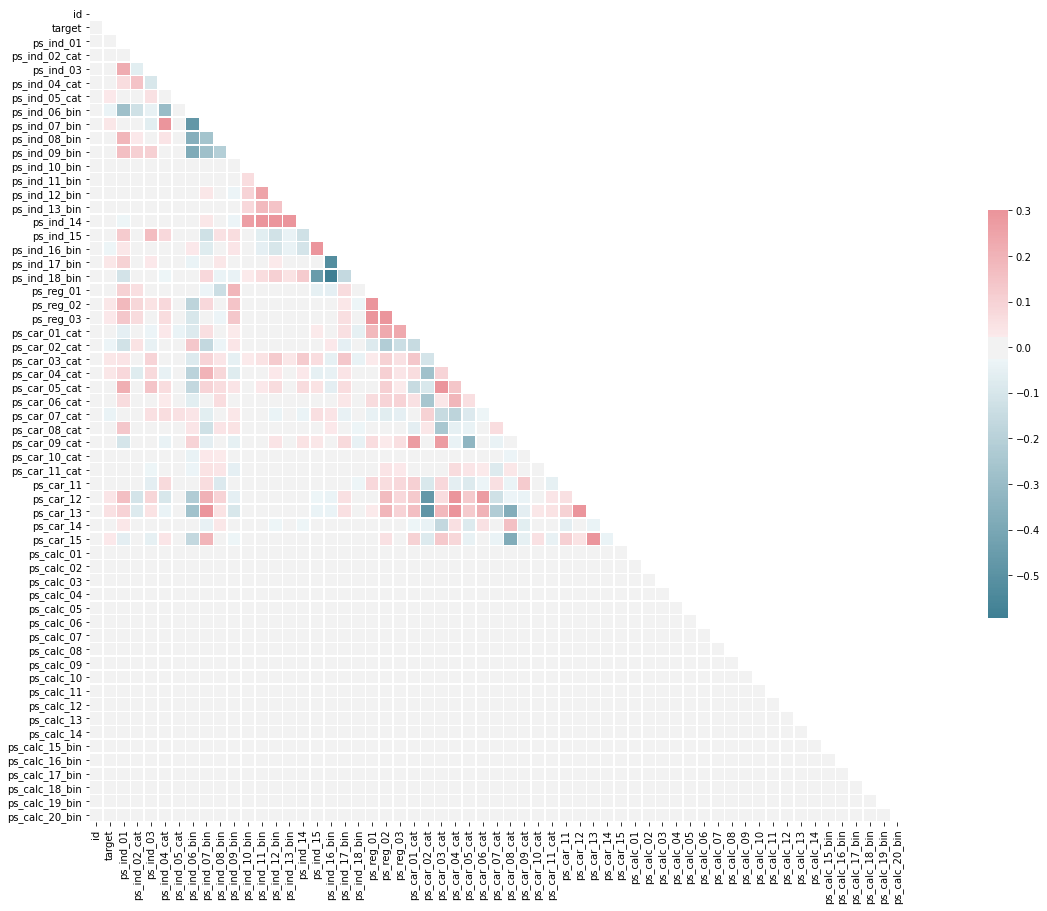

In [17]:
corr = data_nm.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



# 6. Write inferences from data on ordinal variables. 
A. An ordinal variable is a categorical variable for which the possible values are ordered. Ordinal variables can be considered “in between” categorical and quantitative variables. Here we have 17 ordinal variables.


In [35]:
meta_data.level[meta_data.level=='ordinal']

varname
target        ordinal
ps_ind_01     ordinal
ps_ind_03     ordinal
ps_ind_14     ordinal
ps_ind_15     ordinal
ps_car_11     ordinal
ps_calc_04    ordinal
ps_calc_05    ordinal
ps_calc_06    ordinal
ps_calc_07    ordinal
ps_calc_08    ordinal
ps_calc_09    ordinal
ps_calc_10    ordinal
ps_calc_11    ordinal
ps_calc_12    ordinal
ps_calc_13    ordinal
ps_calc_14    ordinal
Name: level, dtype: object

# 7. Write inferences from data on binary variables.
Binary variables are variables which only take two values (E.g 0 or 1 , yes or no). Here we have 17 Variables without considering target variable 


In [36]:
meta_data.level[meta_data.level=='binary']

varname
ps_ind_06_bin     binary
ps_ind_07_bin     binary
ps_ind_08_bin     binary
ps_ind_09_bin     binary
ps_ind_10_bin     binary
ps_ind_11_bin     binary
ps_ind_12_bin     binary
ps_ind_13_bin     binary
ps_ind_16_bin     binary
ps_ind_17_bin     binary
ps_ind_18_bin     binary
ps_calc_15_bin    binary
ps_calc_16_bin    binary
ps_calc_17_bin    binary
ps_calc_18_bin    binary
ps_calc_19_bin    binary
ps_calc_20_bin    binary
Name: level, dtype: object

# 8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance 
Yes, data is not proportionate as we can see below that '0' is taking 96.36% and else by '1' with -3.64% which is less than 30% We face issues of class imbalance in the dataset so the thing to get rid of class imbalance is that :
1). There is very high imbalance which is evident of the fact that only a small number of people actually file their claim.
2). Accuracy is not a good metric in this case.Recall and F1-Score is a better option.

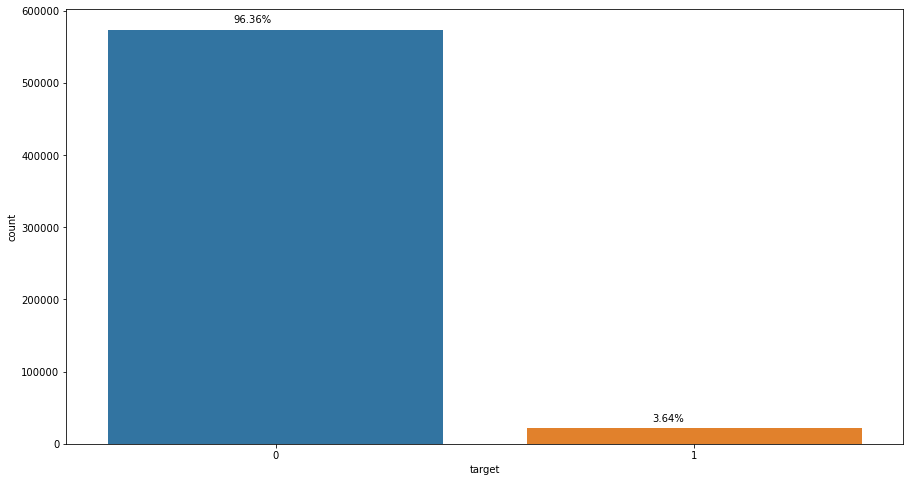

In [37]:
import seaborn as sns
plt.figure(figsize=(15,8))
ax = sns.countplot('target', data=data_nm)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(data_nm['target'])), 
                (p.get_x() + 0.3, p.get_height() + 10000))

# 9. What should be the preferred way in this case to balance the data? 
A.Balancing the data by doing sampling techniques:
Random resampling provides a naive technique for rebalancing the class distribution for an imbalanced dataset.
Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.
Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

SMOTE - Synthetic Minority Over-sampling Technique( Library issues in installation)


Class 0: 573518
Class 1: 21694
Proportion: 26.44 : 1


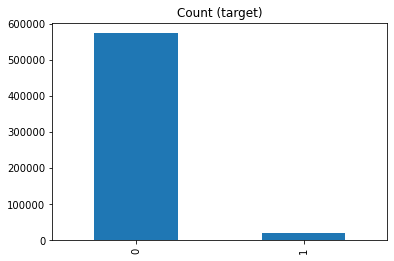

In [38]:
target_count = data_nm.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [39]:
#The metric trap
#One of the major issues that novice users fall into when dealing with unbalanced datasets relates 
#to the metrics used to evaluate their model. Using simpler metrics like accuracy_score can be misleading.
#In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

#Let's do this experiment, using simple cross-validation and no feature engineering:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = data_nm.columns[2:]

X = data_nm[labels]
y = data_nm['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.36%


In [40]:
#Now let's run the same code, but using only one feature (which should drastically reduce the accuracy of the classifier):

model = XGBClassifier()
model.fit(X_train[['ps_calc_01']], y_train)
y_pred = model.predict(X_test[['ps_calc_01']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#As we can see, the high accuracy rate was just an illusion. In this way, the choice of the metric used in unbalanced datasets
#is extremely important. In this competition, the evaluation metric is the Normalized Gini Coefficient, 
#a more robust metric for imbalanced datasets, that ranges from approximately 0 for random guessing, 
#to approximately 0.5 for a perfect score.

Accuracy: 96.36%


Confusion matrix:
 [[114709      0]
 [  4334      0]]


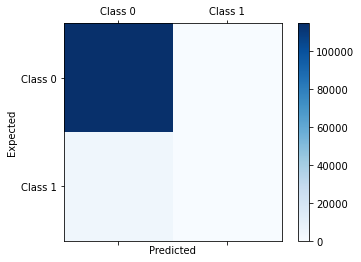

In [41]:
#Confusion matrix
#An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect
#predictions for each class. In the first row, the first column indicates how many classes 0 were predicted correctly,
#and the second column, how many classes 0 were predicted as 1. In the second row, we note that all class 1 
#entries were erroneously predicted as class 0.

#Therefore, the higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [42]:
#Resampling
#Resampling involves creating a new transformed version of the training dataset in which the selected examples
#have a different class distribution.
#A widely adopted technique for dealing with highly unbalanced datasets is called resampling. 
#It consists of removing samples from the majority class (under-sampling) and / or adding more examples 
#from the minority class (over-sampling).#Despite the advantage of balancing classes, these techniques also have 
#their weaknesses . The simplest implementation of over-sampling is to duplicate random 
#records from the minority class, which can cause overfitting. In under-sampling, 
#the simplest technique involves removing random records from the majority class, which can cause loss of information.

#Let's implement a basic example, which uses the DataFrame.sample method to get random samples each class:

# Class count
count_class_0, count_class_1 = data_nm.target.value_counts()

# Divide by class
df_class_0 = data_nm[data_nm['target'] == 0]
df_class_1 = data_nm[data_nm['target'] == 1]

Random under-sampling:
1    21694
0    21694
Name: target, dtype: int64


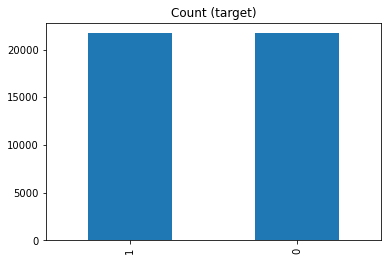

In [43]:
#Radom Under Sampling
#Random undersampling involves randomly selecting examples from the majority class and deleting them 
#from the training dataset.
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

# 11. Which are the top two features in terms of missing values? 
A.The top two features in missing values are 'ps_car_03_cat' and 'ps_car_05_cat' with 69% and 44% approax.
#12. In total, how many features have missing values? 
A.Total , we have 12 features as missing values

Column   Missing count   Missing ratio
ps_reg_03    107772    0.181
ps_car_11    5    0.000
ps_car_12    1    0.000
ps_car_14    42620    0.072
Column   Missing count   Missing ratio
ps_ind_02_cat    216    0.000
ps_ind_04_cat    83    0.000
ps_ind_05_cat    5809    0.010
ps_car_01_cat    107    0.000
ps_car_03_cat    411231    0.691
ps_car_05_cat    266551    0.448
ps_car_07_cat    11489    0.019
ps_car_09_cat    569    0.001

code is below mentioned

In [44]:
##Working on Missing Values
#Values of -1 indicate that the feature was missing from the observation check for -1 (NAs in our data)
# Varibale wise count of missing values
(data_nm==-1).sum().sum()

846453

In [46]:
#Data cleansing
#The next step is to check how many missing values there are for each feature type. 
#As a general rule, I like to eliminate features where more than one half of the values are missing.

# Although it uses more memory, I prefer to create a new copy of the dataframe for each section
df_cleaned = data_nm.copy()

# I will also create copies for the feature lists
num_feats_cleaned = num_feats.copy()
cat_feats_cleaned = cat_feats.copy()
bin_feats_cleaned = bin_feats.copy()

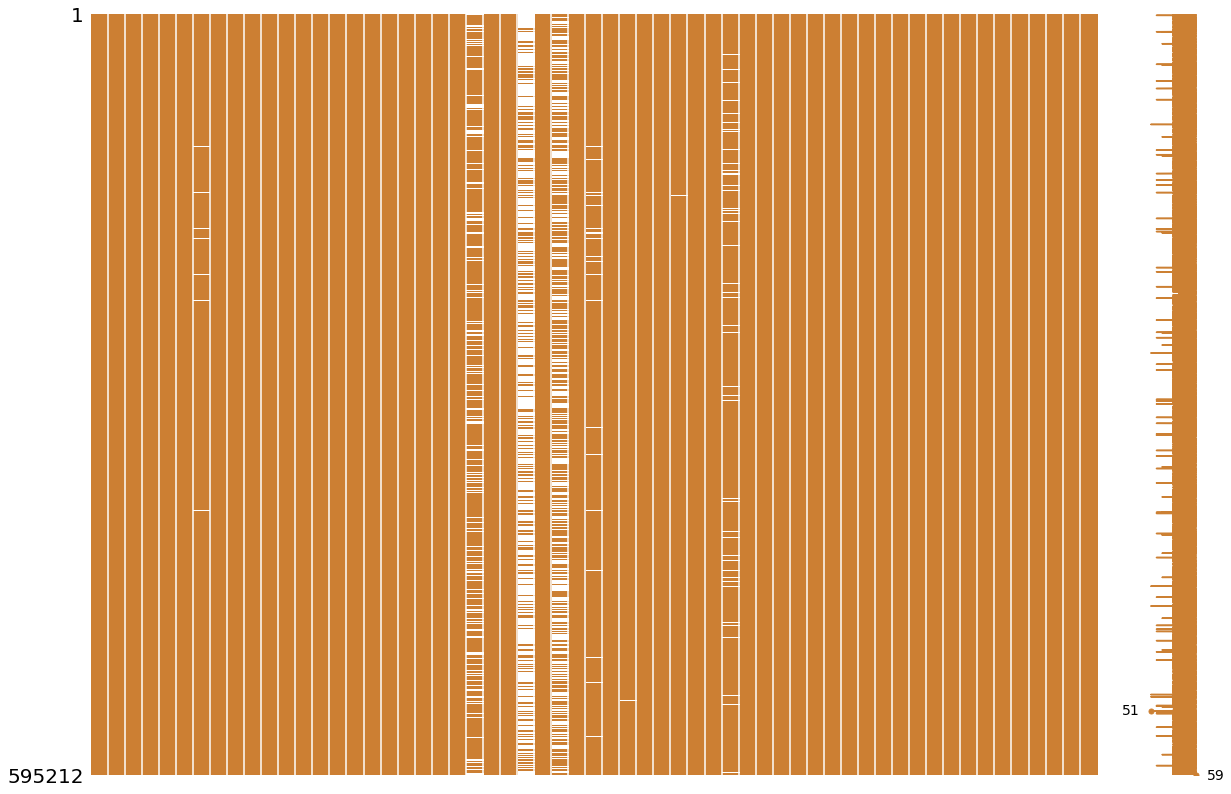

In [47]:
## The white colour represents the Missing values
import missingno as msno

train_null = data_nm
train_null = train_null.replace(-1, np.NaN)

msno.matrix(df=train_null.iloc[:, :], figsize=(20, 14), color=(0.8, 0.5, 0.2))   

In [49]:
# Numerical fields
counts = df_cleaned[num_feats_cleaned][data_nm == -1].count()
cols_with_missing = counts[counts.values > 0]
print('Column  ', 'Missing count  ', 'Missing ratio')
for col, count in zip(cols_with_missing.index, cols_with_missing.values):
    print(col, '  ', count, '  ', '{:.3f}'.format(count / len(data_nm)))
# We can also have a look exactly how many are missing in the applicable columns
counts = df_cleaned[cat_feats_cleaned][data_nm == -1].count()
cols_with_missing = counts[counts.values > 0]
print('Column  ', 'Missing count  ', 'Missing ratio')
for col, count in zip(cols_with_missing.index, cols_with_missing.values):
    print(col, '  ', count, '  ', '{:.3f}'.format(count / len(data_nm)))

Column   Missing count   Missing ratio
ps_reg_03    107772    0.181
ps_car_11    5    0.000
ps_car_12    1    0.000
ps_car_14    42620    0.072
Column   Missing count   Missing ratio
ps_ind_02_cat    216    0.000
ps_ind_04_cat    83    0.000
ps_ind_05_cat    5809    0.010
ps_car_01_cat    107    0.000
ps_car_03_cat    411231    0.691
ps_car_05_cat    266551    0.448
ps_car_07_cat    11489    0.019
ps_car_09_cat    569    0.001


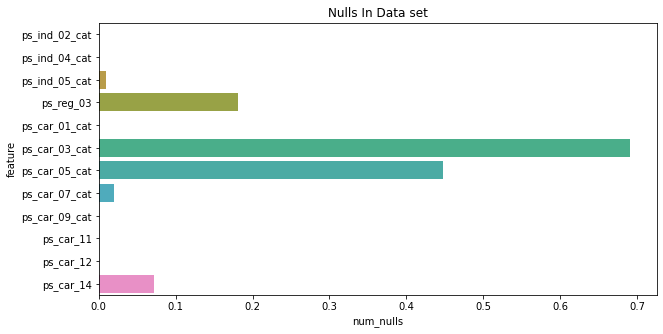

In [103]:
plt.rcParams['figure.figsize']=(10,5)

train_null_columns = []
train_num_nulls = []
for c in data_nm.columns:
    null_rows = data_nm[data_nm[c] == -1]
    if len(null_rows) > 0:
        train_null_columns.append(c)
        train_num_nulls.append(len(null_rows)/len(data_nm))
        
df_train_nulls = pd.DataFrame(columns=['feature', 'num_nulls'])
df_train_nulls['feature'] = train_null_columns
df_train_nulls['num_nulls'] = train_num_nulls
df_train_nulls.head()
ax = sns.barplot(x="num_nulls", y="feature", data=df_train_nulls)
plt.title('Nulls In Data set')
plt.show()

# 13. What steps should be taken to handle the missing data? 
A. If the missing values are above 50% it’s good to remove the variable . And for categorical variables it’s good to check the chi-square value and dummy the variables and remove the un-necessary ones. In dummy variables if one has major percentage then it’s good to impute with mode. 

In [50]:
#We can substitute the missing values with the applicable column mean. This will limit their impact on the results.
# The few missing values that remain will be substituted with the column mean
for col in num_feats_cleaned:
    df_cleaned[col][df_cleaned[col] == -1] = df_cleaned[col].mean()
# Check that no missing values remain
(df_cleaned[num_feats_cleaned] == -1).sum().sum()   # sums instances of true for each column and then sums across columns

#Hence , We can be satisfied that no missing values remain.

0

In [52]:
#Categorical features
#I would like to eliminate any columns that consist of more than one-half missing values (-1). 
#If features contain a relatively small proportion of missing values, these values can be converted to 
#dummy variables and may be a useful part of the analysis.
cat_many_missing = df_cleaned[cat_feats_cleaned][data_nm == -1].count() / len(data_nm) > 0.5
cat_many_missing = cat_many_missing.index[cat_many_missing == True].tolist()
print(cat_many_missing)

['ps_car_03_cat']


In [53]:
#Now I will remove the one column that I identified.
df_cleaned.drop(columns=cat_many_missing, inplace=True)
# The cat_feats list needs to be updated
for i in cat_many_missing: cat_feats_cleaned.remove(i)
#Remaing missing values will be converted to dummy variables during the feature engineering stage.

In [54]:
#Binary features
#Let's now check for missing values among the binary features.

bin_many_missing = df_cleaned[bin_feats_cleaned][data_nm == -1].count() / len(data_nm) > 0.5
bin_many_missing = bin_many_missing.index[bin_many_missing == True].tolist()
print(bin_many_missing)

[]


In [55]:
#We can be sure that there are no features with more than half of there values missing. 
#Let's just make sure that no values at all are missing for the binary features.
# Lets check for missing values, in case any exist
counts = df_cleaned[bin_feats_cleaned][data_nm == -1].count()
cols_with_missing = counts[counts.values > 0]
cols_with_missing

Series([], dtype: int64)

# 14. Which interval variables have strong correlation? 
Yes, out of 10 variables we can see in the corrplot that 7 variables are bit co-related each,the variables are:
ps_reg_01     
ps_reg_02    
ps_reg_03 
ps_car_12     
ps_car_13     
ps_car_14     
ps_car_15    

In [56]:
meta_data.level[meta_data.level=='interval']

varname
ps_reg_01     interval
ps_reg_02     interval
ps_reg_03     interval
ps_car_12     interval
ps_car_13     interval
ps_car_14     interval
ps_car_15     interval
ps_calc_01    interval
ps_calc_02    interval
ps_calc_03    interval
Name: level, dtype: object

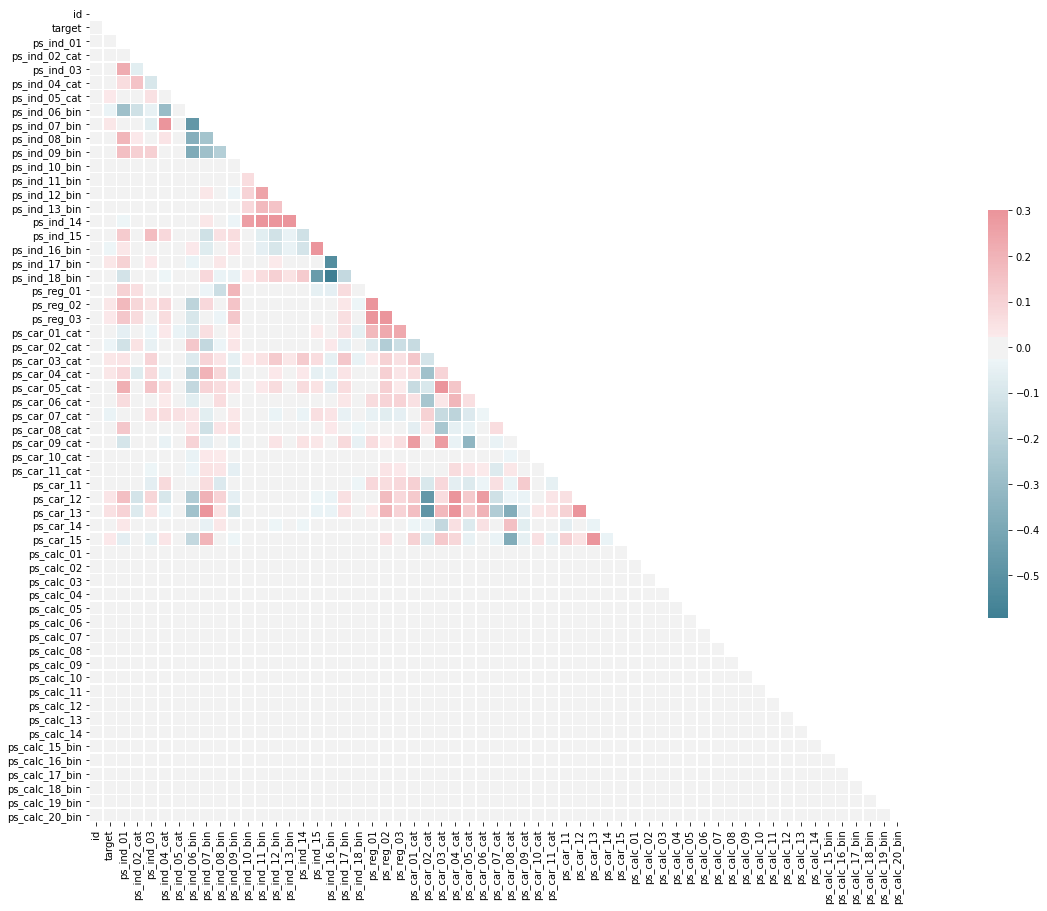

In [66]:
corr = data_nm.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

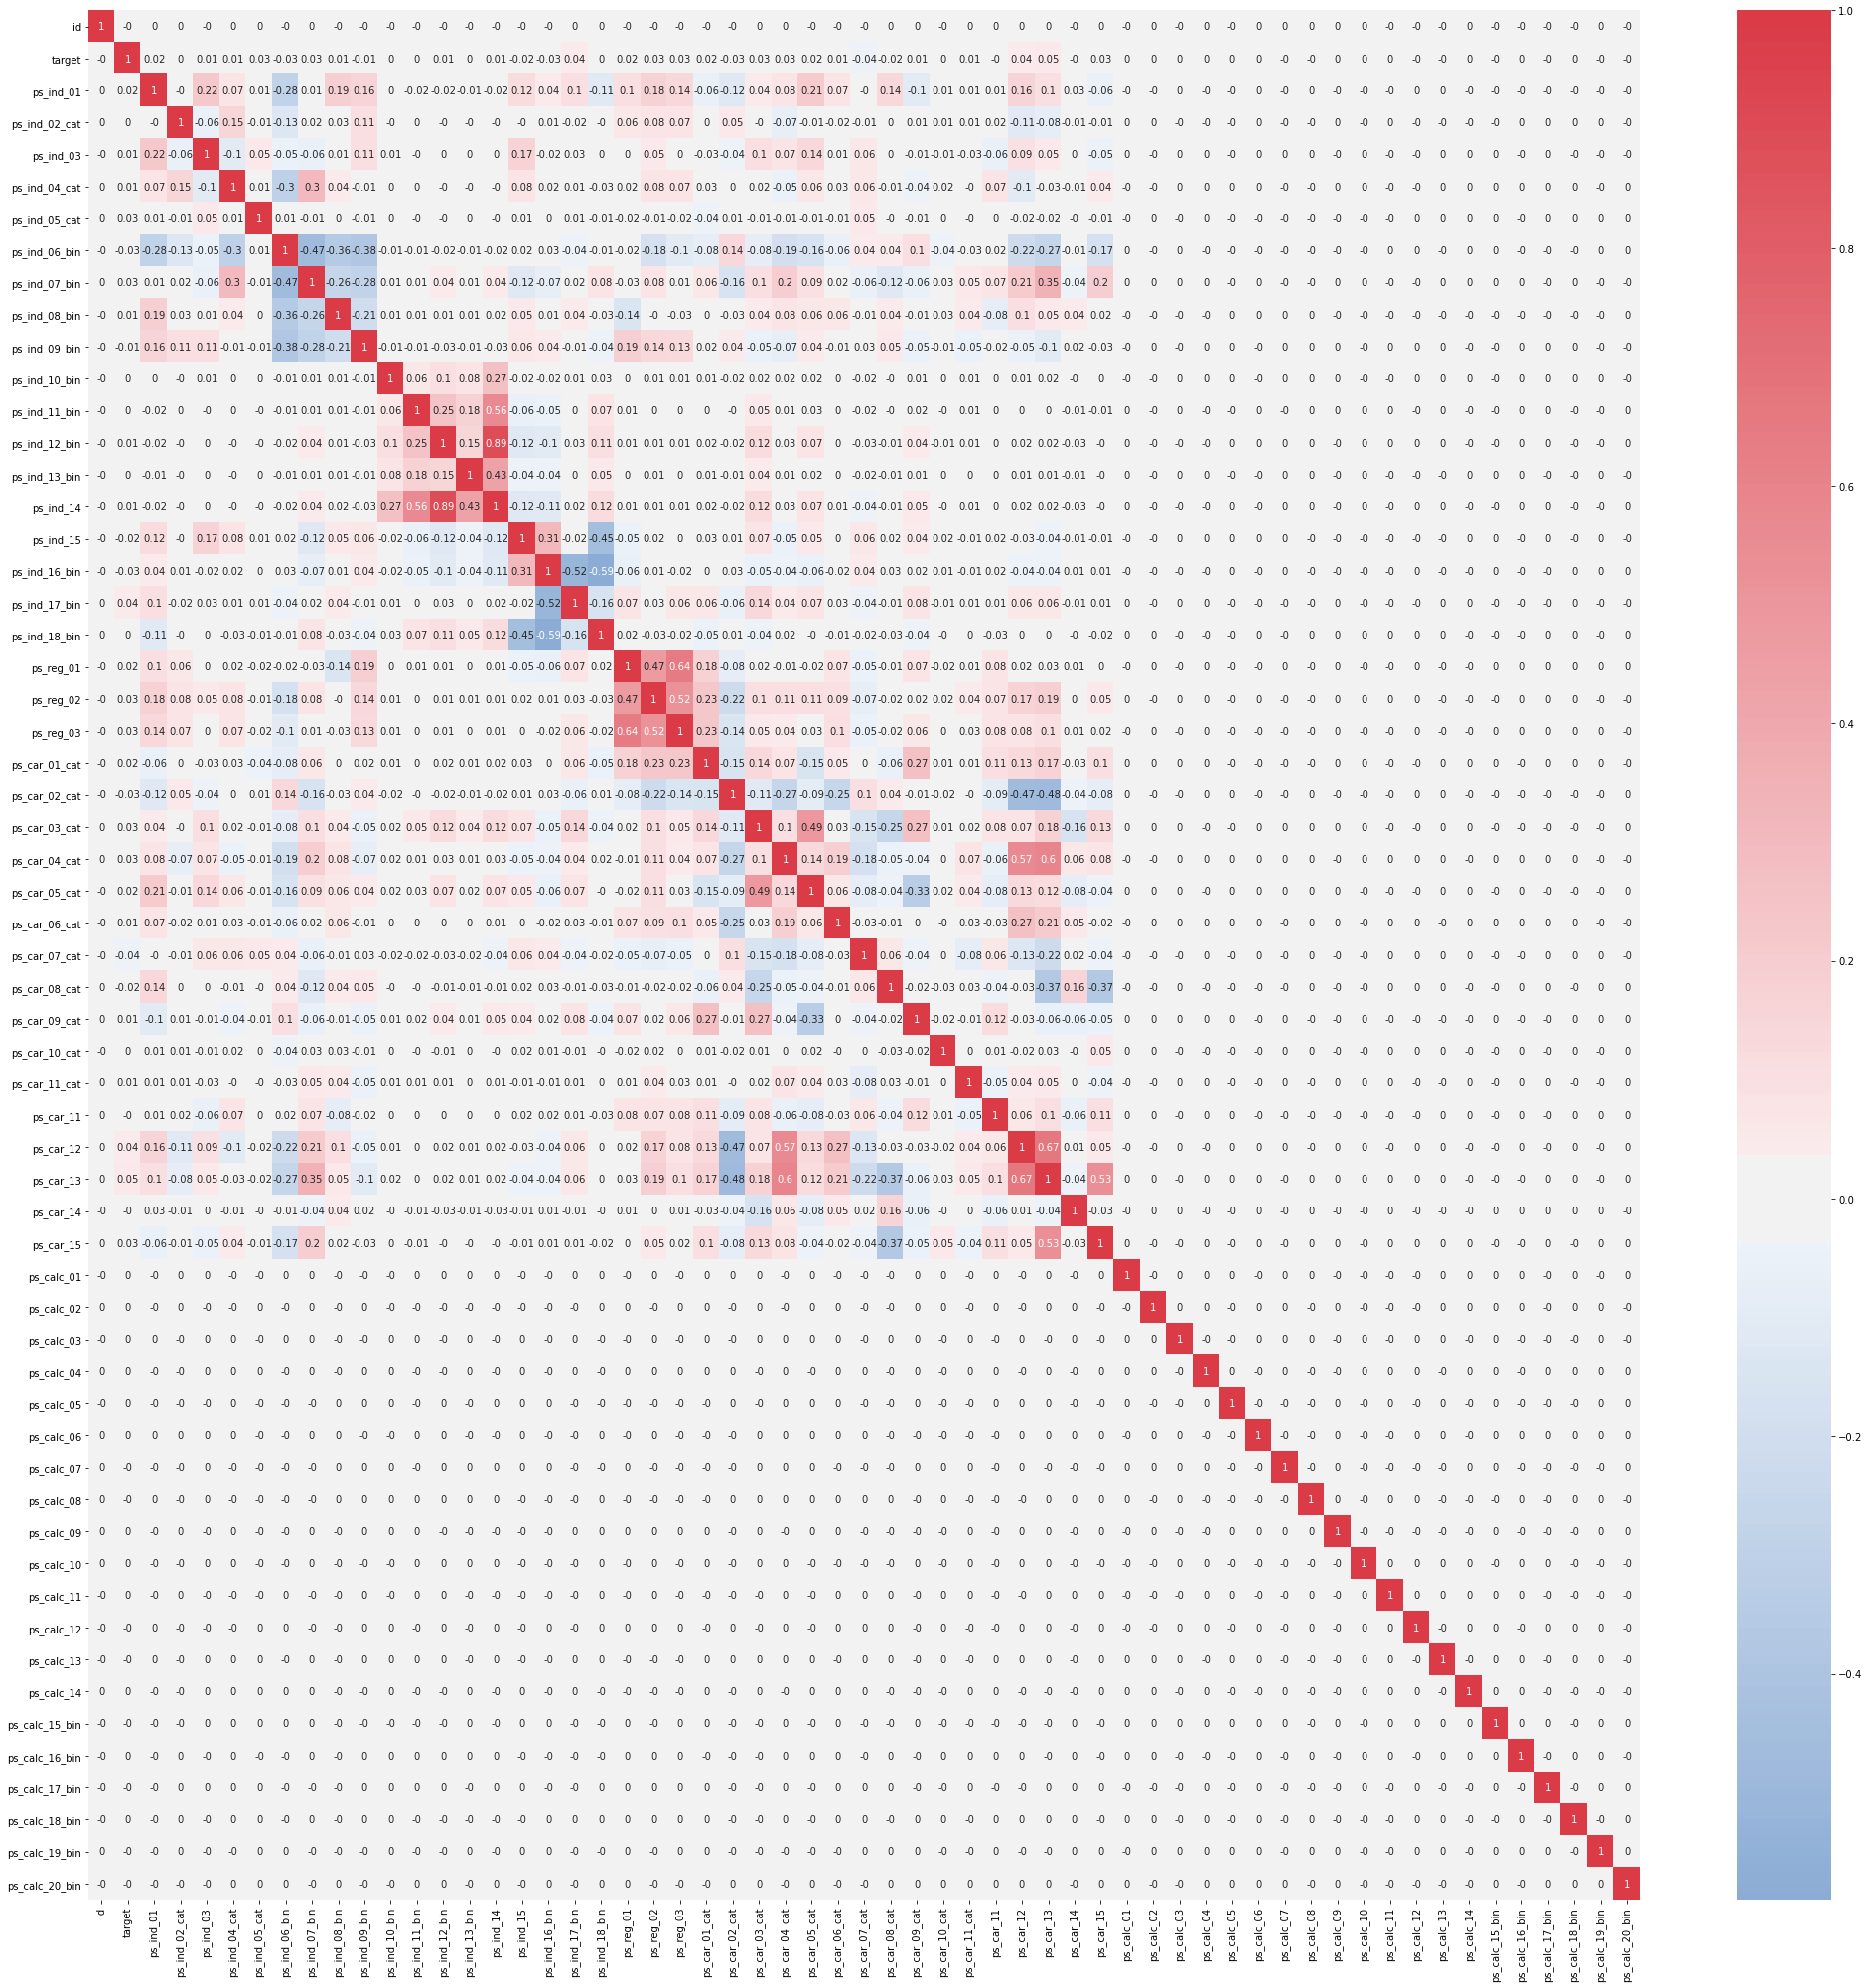

In [71]:
### Co-relation matrix heatmap
# Getting correlation matrix for numeric_fetaures
cor_matrix = data_nm.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(35,35));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()


# 15. What's the level of correlation among ordinal features? 
A.As , ordinal features are mostly in very very low in level in Co-relation of 16 without target variable only 5 variables are nearly corelated as seen in the above corelation plot.
ps_ind_01     
ps_ind_03     
ps_ind_14     
ps_ind_15  
ps_car_11    

In [72]:
meta_data.level[meta_data.level=='ordinal']

varname
target        ordinal
ps_ind_01     ordinal
ps_ind_03     ordinal
ps_ind_14     ordinal
ps_ind_15     ordinal
ps_car_11     ordinal
ps_calc_04    ordinal
ps_calc_05    ordinal
ps_calc_06    ordinal
ps_calc_07    ordinal
ps_calc_08    ordinal
ps_calc_09    ordinal
ps_calc_10    ordinal
ps_calc_11    ordinal
ps_calc_12    ordinal
ps_calc_13    ordinal
ps_calc_14    ordinal
Name: level, dtype: object

# 16. Implement Hot Encoding for categorical features 
#One hot encoding is a powerful technique to transform categorical data into a numerical representation that machine learning #algorithms can utilize to perform optimally without falling into the misrepresentation issue.

# #What is the increase in number of features after one-hot encoding of the data? 
Totally we have 239 Columns in which 180 are the one hot encoder new variables created (Topic - Machine Learning)

In [95]:
#We will now convert our categorical variable into its one-hot encoding representation. 
#To do this, first, we cast our categorical variable into the built-in pandas Categorical data type
#['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 
# 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 
# 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
data_nm['ps_ind_02_cat'] = pd.Categorical(data_nm['ps_ind_02_cat'])
data_nm['ps_ind_04_cat'] = pd.Categorical(data_nm['ps_ind_04_cat'])
data_nm['ps_ind_05_cat'] = pd.Categorical(data_nm['ps_ind_05_cat'])
data_nm['ps_car_01_cat'] = pd.Categorical(data_nm['ps_car_01_cat'])
data_nm['ps_car_02_cat'] = pd.Categorical(data_nm['ps_car_02_cat'])
data_nm['ps_car_04_cat'] = pd.Categorical(data_nm['ps_car_04_cat'])
data_nm['ps_car_05_cat'] = pd.Categorical(data_nm['ps_car_05_cat'])
data_nm['ps_car_06_cat'] = pd.Categorical(data_nm['ps_car_06_cat'])
data_nm['ps_car_07_cat'] = pd.Categorical(data_nm['ps_car_07_cat'])
data_nm['ps_car_08_cat'] = pd.Categorical(data_nm['ps_car_08_cat'])
data_nm['ps_car_09_cat'] = pd.Categorical(data_nm['ps_car_09_cat'])
data_nm['ps_car_10_cat'] = pd.Categorical(data_nm['ps_car_10_cat'])
data_nm['ps_car_11_cat'] = pd.Categorical(data_nm['ps_car_11_cat'])

In [96]:
#Having converted the datatype of our column to categorical, we can now use the pandas method to convert categorical variables
#into dummy/indicator variables with the get_dummies function and we store the results into a new dataframe Dummies.

dfDummies = pd.get_dummies(data_nm['ps_ind_02_cat'], prefix = 'category_1')
dfDummies_1 = pd.get_dummies(data_nm['ps_ind_04_cat'], prefix = 'category_2')
dfDummies_2 = pd.get_dummies(data_nm['ps_ind_05_cat'], prefix = 'category_3')
dfDummies_3 = pd.get_dummies(data_nm['ps_car_01_cat'], prefix = 'category_4')
dfDummies_4 = pd.get_dummies(data_nm['ps_car_02_cat'], prefix = 'category_5')
dfDummies_5 = pd.get_dummies(data_nm['ps_car_04_cat'], prefix = 'category_6')
dfDummies_6 = pd.get_dummies(data_nm['ps_car_05_cat'], prefix = 'category_7')
dfDummies_7 = pd.get_dummies(data_nm['ps_car_06_cat'], prefix = 'category_8')
dfDummies_8 = pd.get_dummies(data_nm['ps_car_07_cat'], prefix = 'category_9')
dfDummies_9 = pd.get_dummies(data_nm['ps_car_08_cat'], prefix = 'category_10')
dfDummies_10 = pd.get_dummies(data_nm['ps_car_09_cat'], prefix = 'category_11')
dfDummies_11 = pd.get_dummies(data_nm['ps_car_10_cat'], prefix = 'category_12')
dfDummies_12 = pd.get_dummies(data_nm['ps_car_11_cat'], prefix = 'category_13')


In [97]:
#As you can see above, we have converted the ps_ind_02_cat into its 4 elements one-hot encoded vector now represented as 4 columns 
#each with the prefix we passed to the get_dummies function
dfDummies_12

,category_13_1,category_13_2,category_13_3,category_13_4,category_13_5,category_13_6,category_13_7,category_13_8,category_13_9,category_13_10,...,category_13_95,category_13_96,category_13_97,category_13_98,category_13_99,category_13_100,category_13_101,category_13_102,category_13_103,category_13_104
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [93]:
data_nm = pd.concat([data_nm, dfDummies], axis=1)

In [99]:
data_nm = pd.concat([data_nm, dfDummies_1], axis=1)
data_nm = pd.concat([data_nm, dfDummies_2], axis=1)
data_nm = pd.concat([data_nm, dfDummies_3], axis=1)
data_nm = pd.concat([data_nm, dfDummies_4], axis=1)
data_nm = pd.concat([data_nm, dfDummies_5], axis=1)
data_nm = pd.concat([data_nm, dfDummies_6], axis=1)
data_nm = pd.concat([data_nm, dfDummies_7], axis=1)
data_nm = pd.concat([data_nm, dfDummies_8], axis=1)
data_nm = pd.concat([data_nm, dfDummies_9], axis=1)
data_nm = pd.concat([data_nm, dfDummies_10], axis=1)
data_nm = pd.concat([data_nm, dfDummies_11], axis=1)
data_nm = pd.concat([data_nm, dfDummies_12], axis=1)

In [100]:
data_nm.shape

(595212, 239)

In [101]:
data_nm.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,category_13_95,category_13_96,category_13_97,category_13_98,category_13_99,category_13_100,category_13_101,category_13_102,category_13_103,category_13_104
0,7,0,2,2,5,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,1,1,7,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,13,0,5,4,9,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,0,0,2,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
print ('No. of Categorical features: %d' % len(cat_feats_cleaned))

No. of Categorical features: 13


# 17. In nominal and interval features, which features are suitable for StandardScaler? 

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

So , Letus first understand what is Nominal and Interval :

In Nominal variables are used to “name,” or label a series of values which belongs to a category of (Qualitative Categorical-Can be grouped)

In Interval the scales give us the order of values + the ability to quantify the difference between each one.(Qunatitative Numerical - Measure).

So , here the interval features are much suitable for StandardScalar .